### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

le.

In [255]:
###########################################README File Explains the Process
with open('README.txt', 'r') as f:
    text = f.read()

print(text)

################################################################################################################################
###                       Practical Application Assignment 5.1: Will the Customer Accept the Coupon?                         ###
###############################################Inital Investigation#############################################################
1. Read Dataset
2. Investigate the Dataset attributes
3. Investigate the dataset for missing or problematic data.
     ###Check Total Number of Records in Dataframe###
     ###Step 1: Duplicate Records###
     ###Step 2: Missing Data in attributes
4. Decide what to do about your missing data -- drop, replace, other...
     ###Plan of Action###
        1. Delete Duplicate Data Points/Records###
        2. Assume 100% of customers own cars for analysis purpose###
        3. Attributes Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse with NaN data to be replaced with 'never' 
           -Sk

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<font size="6">***###Check Total Number of Records in Dataframe###***</font>

In [5]:
cust_coup = data
#cust_coup.shape[0] #12684 Total number of records in dataframe

<font size="6">***###Step 1: Duplicate Records###***</font>

In [6]:
#Dupicate records 74 of 12684 are duplicates
cust_coup.duplicated().value_counts()

False    12610
True        74
Name: count, dtype: int64

<font size="6">***###Step 2: Missing Data in attributes***</font>

In [7]:
cust_coup.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

<Axes: >

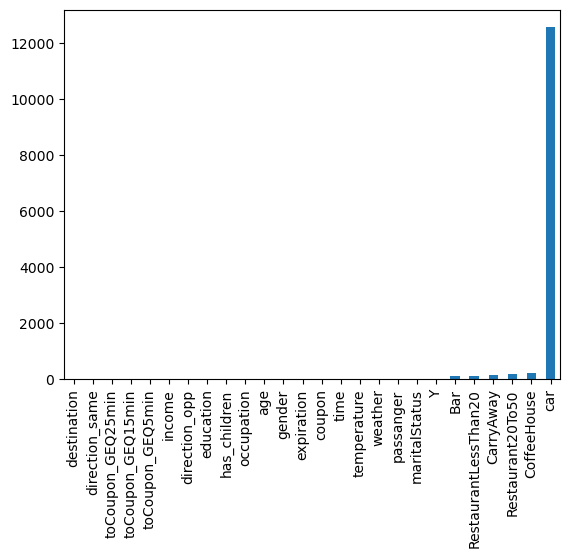

In [8]:
#Missing Data: Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse and Cars
cust_coup.isnull().sum().sort_values().plot(kind = 'bar')


In [9]:
#Missing Data Numbers: Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse
missing_data = [cust_coup.shape[0],cust_coup.shape[0]-cust_coup['car'].count(),cust_coup.shape[0]-cust_coup['Bar'].count(),cust_coup.shape[0]-cust_coup['RestaurantLessThan20'].count(), 
                    cust_coup.shape[0]-cust_coup['CarryAway'].count(),cust_coup.shape[0]-cust_coup['Restaurant20To50'].count(),cust_coup.shape[0]-cust_coup['CoffeeHouse'].count()]

available_data_percentage = [cust_coup.shape[0]/cust_coup.shape[0],cust_coup['car'].count()/cust_coup.shape[0],cust_coup['Bar'].count()/cust_coup.shape[0],cust_coup['RestaurantLessThan20'].count()/cust_coup.shape[0], 
                    cust_coup['CarryAway'].count()/cust_coup.shape[0],cust_coup['Restaurant20To50'].count()/cust_coup.shape[0] ,cust_coup['CoffeeHouse'].count()/cust_coup.shape[0]]

print('Total Records, mis_car, mis_bar, mis_<20,mis_carryaway,mis_20to50,mis_coffeehouse')
print(missing_data )
print('Percentage of data points available for all the above attributes')
print(available_data_percentage )
#Since 98% to 99% of data is available the mising 1%-2% data would not skew much
#Car data is 99% missing so assuming 99% of population has transportation based on the statistica data from 2021 below

Total Records, mis_car, mis_bar, mis_<20,mis_carryaway,mis_20to50,mis_coffeehouse
[12684, 12576, 107, 130, 151, 189, 217]
Percentage of data points available for all the above attributes
[1.0, 0.008514664143803218, 0.9915641753390098, 0.9897508672343109, 0.9880952380952381, 0.9850993377483444, 0.9828918322295805]


<font size="2">***###Cars Owners Data from different sources from 2021 and 2023###***</font>

<font size="2">***###99% of population has transportation based on the statistica data from 2021 below###***</font>

https://www.statista.com/statistics/1041177/us-car-owners-by-income-group/
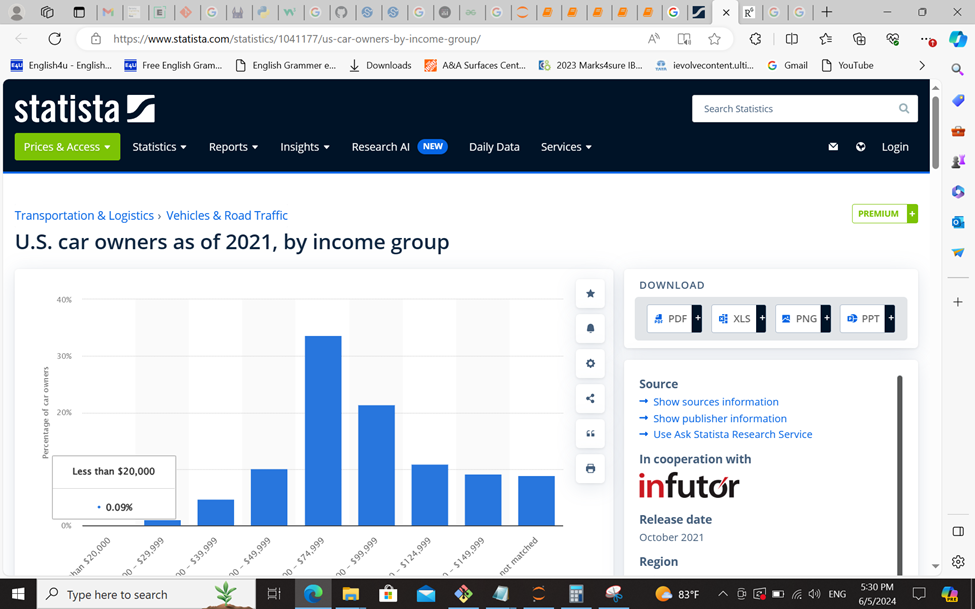

<font size="2">***###92% of population has transportation based on www.autoinsurance.com - Source: U.S. Census Bureau###***</font>

https://www.autoinsurance.com/research/car-ownership-statistics/



3. Decide what to do about your missing data -- drop, replace, other...

<font size="2">***###Plan of Action###***</font>

<font size="2">***1. Delete Duplicate Data Points/Records###***</font>

<font size="2">***2. Assume 100% of customers own cars for analysis purpose###***</font>

<font size="2">***3. Attributes Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse with NaN data to be replaced with 'never' - Skew will be there but less than 2% as we have 98-99% of data###***</font>

<font size="2">***Note: Over all Skew will be due to the assumptions that a) all customers own cars and b) less than 2% from the attributes above replaced by 'never'###***</font>


In [10]:
#Delete Duplicates
cust_coup = cust_coup.drop_duplicates()
cust_coup.shape[0] #Check the total numbers after removing duplicates- 12610

12610

In [11]:
#Replace nan values in the 'car' column with 'do drive'
#cust_coup['car'].unique() 
# Note: Car Column has unieque values of nan, 'Scooter and motorcycle', 'crossover', 'Mazda5','do not drive', 'Car that is too old to install Onstar :D'
cust_coup['car'] = cust_coup['car'].fillna('do drive')
cust_coup[cust_coup['car'] =='do drive'].count() 
#'do drive' count is 12502 and rest is 108 all together its 12610 - which is the same number after deleting duplicates.

C:\Users\shaif\AppData\Local\Temp\ipykernel_19008\2150875456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_coup['car'] = cust_coup['car'].fillna('do drive')


destination             12502
passanger               12502
weather                 12502
temperature             12502
time                    12502
coupon                  12502
expiration              12502
gender                  12502
age                     12502
maritalStatus           12502
has_children            12502
education               12502
occupation              12502
income                  12502
car                     12502
Bar                     12395
CoffeeHouse             12285
CarryAway               12352
RestaurantLessThan20    12373
Restaurant20To50        12313
toCoupon_GEQ5min        12502
toCoupon_GEQ15min       12502
toCoupon_GEQ25min       12502
direction_same          12502
direction_opp           12502
Y                       12502
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [12]:
print("Proportion of observations to accept the coupon are:", cust_coup['Y'].sum()/(cust_coup.shape[0]))

Proportion of observations to accept the coupon are: 0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

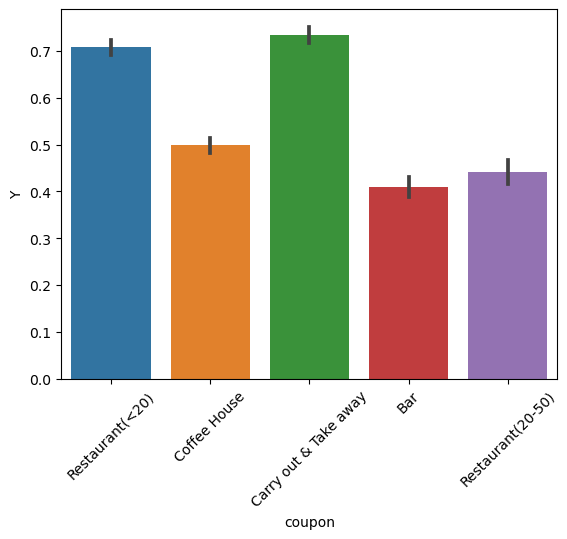

In [13]:
sns.barplot(x="coupon", y="Y", data=cust_coup)
plt.xticks(rotation=45)
#cust_coup[['Y']].sum().plot(kind='bar')
#sns.barplot(x="Y", data=cust_coup)

6. Use a histogram to visualize the temperature column.

C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Data')

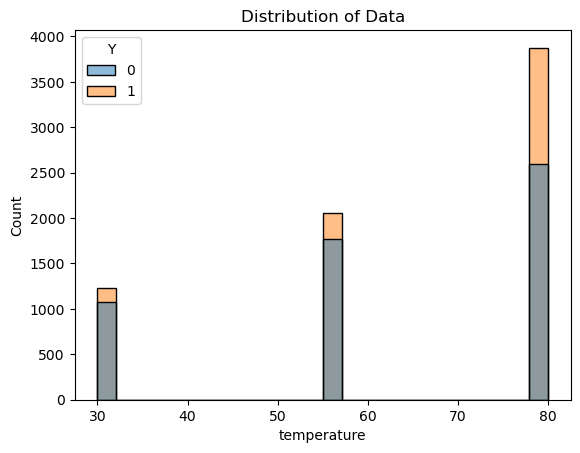

In [14]:
sns.histplot(data = cust_coup, x = 'temperature', hue = 'Y').set_title("Distribution of Data" )


C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Data')

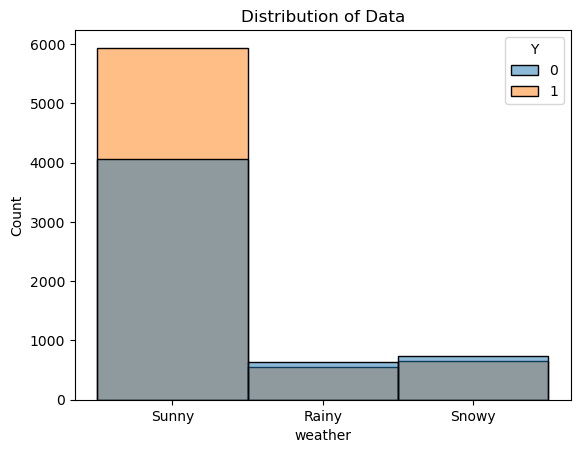

In [15]:
sns.histplot(data = cust_coup, x = 'weather', hue = 'Y').set_title("Distribution of Data" )

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [210]:
bar_cust_coup = cust_coup[cust_coup['coupon'] == 'Bar']
bar_cust_coup
#cust_coup[cust_coup['coupon'] == 'Bar'].shape[0] #Total number of data points pertaining to Bar Coupon 2010
#bar_cust_coup[bar_cust_coup['Bar'].isnull()].shape[0] # Total number of null values in Bar Column 21
# Note that the Bar column does not have all their values. Drop rows missing
bar_cust_coup = bar_cust_coup.dropna(subset = ['Bar']) 
bar_cust_coup[bar_cust_coup['Bar'].isnull()].shape[0] 

0

2. What proportion of bar coupons were accepted?


In [228]:
print("Proportion of bar coupons were accepted:", bar_cust_coup['Y'].sum()/(bar_cust_coup.shape[0]))

Proportion of bar coupons were accepted: 0.41025641025641024


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate between those who went to a bar 3 or fewer times a month is: 
33.33333333333333
Acceptance rate between those who went to a bar 4 or more times a month is: 
7.6923076923076925


C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Rate of acceptance decreases as the frequency of bar visits increase')

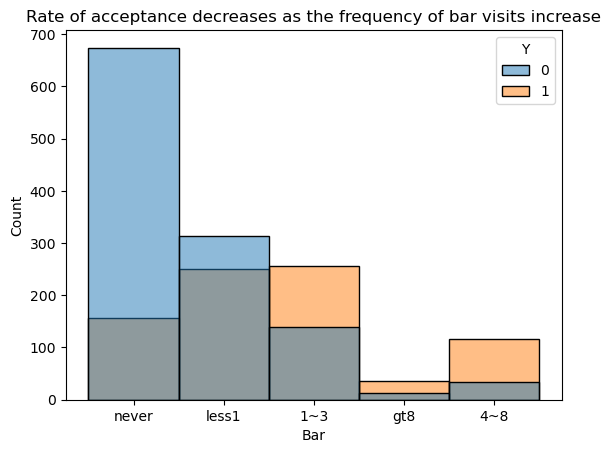

In [201]:
Percentage3orfewer = ''
Percentage4ormore = ''
groups_3orfewer = ['1~3','less1','never']
groups_4ormore = ['4~8','gt8']
bar_cust_coup_3orfewer = bar_cust_coup.query('Bar in @groups_3orfewer')
bar_cust_coup_4ormore = bar_cust_coup.query('Bar in @groups_4ormore')
Percentage3orfewer = bar_cust_coup_3orfewer['Y'].sum()/(bar_cust_coup.shape[0])*100
Percentage4ormore = bar_cust_coup_4ormore['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between those who went to a bar 3 or fewer times a month is: ')
print(Percentage3orfewer)
print('Acceptance rate between those who went to a bar 4 or more times a month is: ')
print(Percentage4ormore)

#bar_cust_coup['Bar'].value_counts()
sns.histplot(data = bar_cust_coup, x = 'Bar', hue = 'Y').set_title("Rate of acceptance decreases as the frequency of bar visits increase" )
#px.bar(bar_cust_coup, x = "Bar", y="age", color = "Y")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [160]:
Percentage_others = ''
Percentage_1ormore = ''
groups_others = ['less1','never']
groups_1ormore = ['1~3','4~8','gt8']
groups_over25 = ['26','31','50plus','36','41','46']
groups_below25 = ['21','below21']
bar_cust_coup_1ormore = bar_cust_coup.query("Bar in @groups_1ormore & age in @groups_over25")
bar_cust_coup_1ormore = bar_cust_coup_1ormore['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is: ')
print(bar_cust_coup_1ormore)

#All others are drivers that belong in group_1ormore and below 21 + all in group_others
bar_cust_coup_group1ormore_below25 = bar_cust_coup.query("Bar in @groups_1ormore & age in @groups_below25") 
bar_cust_coup_group1ormore_below25 = bar_cust_coup_group1ormore_below25['Y'].sum()/(bar_cust_coup.shape[0])*100

bar_group_others = bar_cust_coup.query("Bar in @groups_others")
bar_group_others = bar_group_others['Y'].sum()/(bar_cust_coup.shape[0])*100
all_others = bar_cust_coup_group1ormore_below25 + bar_group_others
print('Acceptance rate of drivers who are went to Bar less than once or never + those who went more than once a month and below 25 are: ')
print(all_others)

Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is: 
14.6807440925088
Acceptance rate of drivers who are went to Bar less than once or never + those who went more than once a month and below 25 are: 
26.344896933132226


In [175]:
#bar_cust_coup['occupation'].value_counts()
#'Farming Fishing & Forestry'

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [184]:
# occupation not 'Farming Fishing & Forestry'
# passanger not Kid(s) 
groups_1ormore = ['1~3','4~8','gt8']
bar_cust_coup_1ormore_nokids = bar_cust_coup.query("Bar in @groups_1ormore & passanger !='Kid(s)' & occupation !='Farming Fishing & Forestry'")
bar_cust_coup_1ormore_nokids = bar_cust_coup_1ormore_nokids['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to bars more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: ')
print(bar_cust_coup_1ormore_nokids)

Acceptance rate between drivers who go to bars more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: 
19.75867269984917


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [195]:
groups_1ormore = ['1~3','4~8','gt8']
groups_below30 = ['26','21','below21']
groups_4ormore_cheep_resturant = ['4~8','gt8']
groups_income = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']

bar_cust_coup_1ormore_nokids_nowidowed = bar_cust_coup.query("Bar in @groups_1ormore & passanger !='Kid(s)' & maritalStatus !='Widowed'")
bar_cust_coup_1ormore_nokids_nowidowed = bar_cust_coup_1ormore_nokids_nowidowed['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: ')
print(bar_cust_coup_1ormore_nokids_nowidowed)

bar_cust_coup_1ormore_below30 = bar_cust_coup.query("Bar in @groups_1ormore & age in @groups_below30")
bar_cust_coup_1ormore_below30 = bar_cust_coup_1ormore_below30['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to bars more than once a month and under age 30 is: ')
print(bar_cust_coup_1ormore_below30)

bar_cust_coup_income_below50 = bar_cust_coup.query("RestaurantLessThan20 in @groups_4ormore_cheep_resturant & income in @groups_income")
bar_cust_coup_income_below50 = bar_cust_coup_income_below50['Y'].sum()/(bar_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k is: ')
print(bar_cust_coup_income_below50)


Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: 
19.75867269984917
Acceptance rate between drivers who go to bars more than once a month and under age 30 is: 
12.518853695324283
Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k is: 
7.7928607340372045


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Summary of the results of investigation below:
25
 Acceptance rate between those who went to a bar 3 or fewer times a month is: 33.33333333333333
2. 1. Acceptance rate of drivers who are went to Bar less than once or never + those who went more than once a month and below 25 are: 26.344896933132236
2. Acceptance rate between drivers who go to bars more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: 
19.7586726998441
3. Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: 
19.75867269984517743. Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is: 14.68074409260
5. Acceptance rate between drivers who go to bars more than once a month and under age 30 is: 
12.51885369532478
6. 
Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k is 
7.7928607340
8. Acceptance rate between those who went to a bar 4 or more times a month is: 7.6923076923076925372

Hypothesis:
People who are most likely to accept the coupon are: 
        The ones who went to a bar 3 or fewer times a month 25
        The young ones below 25er 
        c. the ones who went to bars more than once a month with no kids along with passengers.
People who are likely to accept the coupon are: 
        a. the ones with age between 25 and 30. As the age increases from 25 to 30 the acceptance rate falls.0People who are least likely to accept the coupon are: 
        a. the ones who go to cheep resturants more than 4 times a month and income less than 50k.

Note: Since most of the coupons accepted were on 'Sunny Day' this parameter is heavily influenced by the rate of acceptance subsets.4588


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [198]:
cust_coup['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [225]:
########################################Exploring 'Coffee House' coupon########################################
ch_cust_coup = cust_coup[cust_coup['coupon'] == 'Coffee House']
ch_cust_coup = ch_cust_coup.dropna(subset = ['CoffeeHouse']) 
ch_cust_coup[ch_cust_coup['CoffeeHouse'].isnull()].shape[0] 
ch_cust_coup['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1072
1~3      1038
never     927
4~8       538
gt8       342
Name: count, dtype: int64

In [227]:
#What proportion of bar coupons were accepted?
print("Proportion of bar coupons were accepted:", ch_cust_coup['Y'].sum()/(ch_cust_coup.shape[0]))

Proportion of bar coupons were accepted: 0.4993617564462599


Acceptance rate between those who went to a Coffee House 3 or fewer times a month is: 
34.771508807761045
Acceptance rate between those who went to a Coffee House 4 or more times a month is: 
15.16466683686495


C:\Users\shaif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Rate of acceptance decreases as the frequency of Coffee House visits increase')

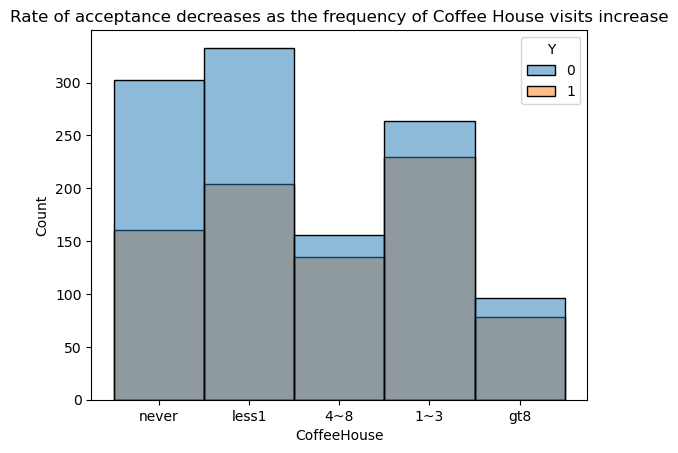

In [232]:
######Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.####
Percentage3orfewer_ch = ''
Percentage4ormore_ch = ''
groups_3orfewer = ['1~3','less1','never']
groups_4ormore = ['4~8','gt8']
ch_cust_coup_3orfewer = ch_cust_coup.query('CoffeeHouse in @groups_3orfewer')
ch_cust_coup_4ormore = ch_cust_coup.query('CoffeeHouse in @groups_4ormore')
Percentage3orfewer_ch = ch_cust_coup_3orfewer['Y'].sum()/(ch_cust_coup.shape[0])*100
Percentage4ormore_ch = ch_cust_coup_4ormore['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between those who went to a Coffee House 3 or fewer times a month is: ')
print(Percentage3orfewer)
print('Acceptance rate between those who went to a Coffee House 4 or more times a month is: ')
print(Percentage4ormore)

#bar_cust_coup['Bar'].value_counts()
sns.histplot(data = bar_cust_coup, x = 'CoffeeHouse', hue = 'Y').set_title("Rate of acceptance decreases as the frequency of Coffee House visits increase" )
#px.bar(bar_cust_coup, x = "Bar", y="age", color = "Y")

In [235]:
#Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. 
#Is there a difference?
Percentage_others_ch = ''
Percentage_1ormore_ch = ''
groups_others = ['less1','never']
groups_1ormore = ['1~3','4~8','gt8']
groups_over25 = ['26','31','50plus','36','41','46']
groups_below25 = ['21','below21']
ch_cust_coup_1ormore = ch_cust_coup.query("CoffeeHouse in @groups_1ormore & age in @groups_over25")
ch_cust_coup_1ormore = ch_cust_coup_1ormore['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 is: ')
print(ch_cust_coup_1ormore)

#All others are drivers that belong in group_1ormore and below 21 + all in group_others
ch_cust_coup_group1ormore_below25 = ch_cust_coup.query("CoffeeHouse in @groups_1ormore & age in @groups_below25") 
ch_cust_coup_group1ormore_below25 = ch_cust_coup_group1ormore_below25['Y'].sum()/(ch_cust_coup.shape[0])*100

ch_group_others = ch_cust_coup.query("CoffeeHouse in @groups_others")
ch_group_others = ch_group_others['Y'].sum()/(bar_cust_coup.shape[0])*100
all_others = ch_cust_coup_group1ormore_below25 + ch_group_others
print('Acceptance rate of drivers who are went to choffee house less than once or never + those who went more than once a month and below 25 are: ')
print(all_others)

Acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 is: 
22.057697217258106
Acceptance rate of drivers who are went to choffee house less than once or never + those who went more than once a month and below 25 are: 
44.95375574082267


In [237]:
# occupation not 'Farming Fishing & Forestry' - excluding this make sence since they work in remote areas away from city 
# passanger not Kid(s) 
groups_1ormore = ['1~3','4~8','gt8']
ch_cust_coup_1ormore_nokids = ch_cust_coup.query("CoffeeHouse in @groups_1ormore & passanger !='Kid(s)' & occupation !='Farming Fishing & Forestry'")
ch_cust_coup_1ormore_nokids = ch_cust_coup_1ormore_nokids['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to coffee house more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: ')
print(ch_cust_coup_1ormore_nokids)

Acceptance rate between drivers who go to coffee house more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: 
30.533571610926728


In [239]:
#Compare the acceptance rates between those drivers who:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.
groups_1ormore = ['1~3','4~8','gt8']
groups_below30 = ['26','21','below21']
groups_4ormore_cheep_resturant = ['4~8','gt8']
groups_income = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']

ch_cust_coup_1ormore_nokids_nowidowed = ch_cust_coup.query("CoffeeHouse in @groups_1ormore & passanger !='Kid(s)' & maritalStatus !='Widowed'")
ch_cust_coup_1ormore_nokids_nowidowed = ch_cust_coup_1ormore_nokids_nowidowed['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: ')
print(bar_cust_coup_1ormore_nokids_nowidowed)

ch_cust_coup_1ormore_below30 = ch_cust_coup.query("CoffeeHouse in @groups_1ormore & age in @groups_below30")
ch_cust_coup_1ormore_below30 = ch_cust_coup_1ormore_below30['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to bars more than once a month and under age 30 is: ')
print(ch_cust_coup_1ormore_below30)

ch_cust_coup_income_below50 = ch_cust_coup.query("RestaurantLessThan20 in @groups_4ormore_cheep_resturant & income in @groups_income")
ch_cust_coup_income_below50 = ch_cust_coup_income_below50['Y'].sum()/(ch_cust_coup.shape[0])*100
print('Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k is: ')
print(ch_cust_coup_income_below50)

Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: 
19.75867269984917
Acceptance rate between drivers who go to bars more than once a month and under age 30 is: 
17.334694919581313
Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k is: 
10.160837375542506


Summary of the results of investigation for coffee house subset below:

1. Acceptance rate of drivers who are went to coffee house less than once or never + those who went more than once a month and below 25 is: 
44.95375574082267
2. Acceptance rate between those who went to a Coffee House 3 or fewer times a month is: 34.771508807761045
3. Acceptance rate between drivers who go to coffee house more than once a month and no kids as passengers and had occupations other than farming, fishing, or forestry is: 30.533571610926728
5. Acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 is: 
22.05769721725810
6. Acceptance rate between drivers who go to bars more than once a month with passengers no kids and no widowed  is: 19.75867269984917
7. Acceptance rate between drivers who go to bars more than once a month and under age 30 is: 17.334694919581313
8. Acceptance rate between those who went to a Coffee House 4 or more times a month is: 15.16466683686495
9. 13
Acceptance rate between drivers who go to cheep resturants more than 4 times a month and income less than 50k s: 
10.1608373755425066728


HypPeople who are most likely to accept the coupon are: 
        a. those who went to a coffee house 3 or fewer times a month
        b. those young ones below 25
        c. those who went to coffee house more than once a month with no kids along with passengers.ssengers.
People who are likely to accept the coupon are: 
    ose the ones with age between . As the age increases from 25 to 30 the acceptance rate falls.5 and 30.
People who are least likely to accept the coupon are: 
  those who went to a Coffee House 4 or more times a month
        b.   ose the ones who go to cheep resturants more than 4 times a month and income less than 50k.

Note: Since most of the coupons accepted were on 'Sunny Day' this parameter is heavily influenced by the rate of acceptance subsets.495

Conclusion: Hypothesis for both Bar and Coffee House is pretty much the same. 

Next steps and recommendations: 
1. Same model can be created and trained for both Bar and Coffee House subsets.
2. If all other 3 subsets investigation confirms to the same hypothesis as above then one model would be sufficient for all.
3. if none of the other 3 subsets investigation cofirms to same hypothesis above the max number of model would be 4.